In [1]:
# Pandas is used for data manipulation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_recall_fscore_support, f1_score, roc_curve, roc_auc_score, RocCurveDisplay, auc
from collections import Counter
from sklearn import preprocessing
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree

In [2]:


def convert(data):
    number = preprocessing.LabelEncoder()
    data['operator'] = number.fit_transform(data.operator)
    data['methodReturn'] = number.fit_transform(data.methodReturn)
    data['isKilled'] = number.fit_transform(data.isKilled)
    return data

# training_dataII.csv is the training file with oversampling
features = pd.read_csv('/home/akash/Documents/repos/MLProject/training_dataII.csv',encoding= 'unicode_escape')
#print(features)
#print('The shape of our features is:', features.shape)

#Convert string to float
features=convert(features)
#print(features)
#print('The shape of our features is:', features.shape) 

# Use numpy to convert to arrays
# Labels are the values we want to predict
labels = np.array(features['isKilled'])
# Remove the labels from the features
# axis 1 refers to the columns
features= features.drop('isKilled', axis = 1)
# Saving feature names for later use
feature_list = list(features.columns)
# Convert to numpy array
features = np.array(features)

In [3]:

dt = tree.DecisionTreeClassifier()
dt.fit(features, labels)
y_pred_train = dt.predict(features)
print(accuracy_score(labels, y_pred_train))
print(confusion_matrix(labels, y_pred_train))

0.9865399863674934
[[456656  13534]
 [   980 607135]]


[0.00300452 0.00197608 0.00498699 0.00944271 0.00333473 0.00486651
 0.0044368  0.0081354  0.9332129  0.00787573 0.00321172 0.0056708
 0.00621385 0.00363127]


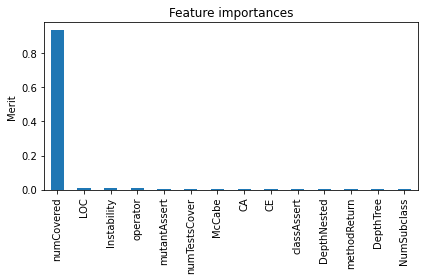

In [4]:
##Plot feature importance
feature_names = [f"features {i}" for i in range(features.shape[1])]
feature_names = ['DepthTree', 'NumSubclass', 'McCabe', 'LOC','DepthNested','CA','CE','Instability','numCovered','operator','methodReturn','numTestsCover','mutantAssert','classAssert']
importances = dt.feature_importances_
print(importances)
tree_importances = pd.Series(importances, index=feature_names).sort_values(ascending=False)

#Feature importance
fig, ax = plt.subplots()
tree_importances.plot.bar(ax=ax)
ax.set_title("Feature importances")
ax.set_ylabel("Merit")
fig.tight_layout()

0.8263206098645045
Confusion_matrix:
 [[85685  7297]
 [18493 37017]]
(0.8263206098645045, 0.8263206098645045, 0.8263206098645045, None)
0.8263206098645045
[0.         0.56602414 0.56651054 0.56654657 0.56679877 0.56681679
 0.56786165 0.56791569 0.5686543  0.56915871 0.5700054  0.57056386
 0.57281571 0.57418483 0.5745091  0.57456314 0.57641866 0.57659881
 0.57834624 0.57858044 0.57863448 0.58477752 0.58479553 0.58548009
 0.58551612 0.60039632 0.60041434 0.60046838 0.60073861 0.60138714
 0.60275626 0.60279229 0.6028103  0.6030445  0.60318861 0.60333273
 0.6354891  0.63620969 0.63624572 0.64462259 0.64501892 0.64510899
 0.64573951 0.64599171 0.64608179 0.65537741 0.65537741 0.65635021
 0.65635021 0.65944875 0.65952081 0.66546568 0.66553774 0.66678076
 0.66685282 0.67517564 0.67519366 0.67549991 0.675608   0.67562601
 0.67580616 0.67586021 0.67591425 0.67593226 0.67598631 1.        ] [0.         0.06035577 0.06036652 0.06036652 0.06036652 0.06036652
 0.06039879 0.06039879 0.06049558 0.0605

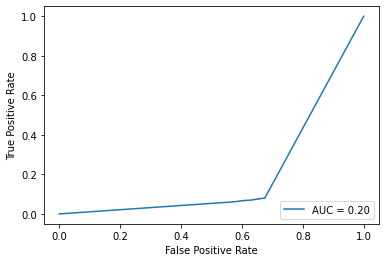

In [5]:
##Input test data
positive_prob = []
test = pd.read_csv('/home/akash/Downloads/Machine/Machine Learning Final Project/Data/testing_data.csv',encoding= 'unicode_escape')

#Convert string to float
test=convert(test)

# ## Labels are the values we want to predict
test_labels = np.array(test['isKilled'])

# # Remove the labels from the features
# # axis 1 refers to the columns
test= test.drop('isKilled', axis = 1)
# # Saving feature names for later use
feature_list = list(test.columns)
# # Convert to numpy array
test = np.array(test)
y_pred_test = dt.predict(test)
#print("Predicted labels::", y_pred_test)
print(accuracy_score(test_labels, y_pred_test))
confusion = confusion_matrix(test_labels, y_pred_test)
print("Confusion_matrix:\n",confusion)
print(precision_recall_fscore_support(test_labels, y_pred_test, average='micro'))
print(f1_score(test_labels, y_pred_test, average='micro'))

# # #Get the probability of each predictions
predicted = dt.predict_proba(test)
#print(predicted)
# # #Take the positive predictictability i.e. survived for calculating ROC AUC
for i in predicted:
    positive_prob.append(i[1])
#print(positive_prob)
#Calculate ROC
fpr, tpr, thresholds = roc_curve(test_labels, positive_prob, pos_label=0)
print(fpr, tpr, thresholds)
try:
    print("AUC: ", roc_auc_score(test_labels, positive_prob))
    roc_auc = auc(fpr, tpr)
    print(roc_auc)
except:
    pass
display = RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=roc_auc)
display.plot()

In [6]:
##Validation set create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.5)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)
dt = tree.DecisionTreeClassifier()
print(type(dt))
dt.fit(features, labels)
y_pred_train = dt.predict(X_test)
print(accuracy_score(y_test, y_pred_train))
print(confusion_matrix(y_test, y_pred_train))

(539152, 14) (539152,)
(539153, 14) (539153,)
<class 'sklearn.tree._classes.DecisionTreeClassifier'>
0.9866383011872326
[[228326   6721]
 [   483 303623]]


In [7]:
from sklearn.model_selection import PredefinedSplit, GridSearchCV
split_index = [-1] * len(X_train) + [0]*len(X_test)
X = np.concatenate((X_train, X_test), axis =0)
y = np.concatenate((y_train, y_test), axis = 0)
pds = PredefinedSplit(test_fold = split_index)
pds.get_n_splits()

1

In [8]:
dt =tree.DecisionTreeClassifier()
print(dt.get_params().keys())
rf = RandomForestClassifier()
print(rf.get_params().keys())

dict_keys(['ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'random_state', 'splitter'])
dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])


In [9]:
#Hyper parameter tuning
#Criterion to getinformation gain
criterion = ['entropy','gini']
#splitter
splitter = ["best", "random"]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 100, num = 10)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Create the random grid
random_grid = {
                'criterion':criterion,
                'splitter' :splitter,
                'max_depth': max_depth,
                'min_samples_split': min_samples_split,
                'min_samples_leaf': min_samples_leaf,
                'max_features': max_features
                }

# Import the model we are using
dt = tree.DecisionTreeClassifier()
# Use the random grid to search for best hyperparameters
# First create the base model to tune

dt_random = RandomizedSearchCV(estimator = dt, param_distributions = random_grid, n_iter = 100, cv = 5, verbose=2, random_state=5, n_jobs = -1)



dt_random.fit(features, labels)
print(dt_random.best_params_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
{'splitter': 'best', 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 90, 'criterion': 'entropy'}


In [24]:
best_entropy_with_cv = dt_random.best_estimator_
print(best_entropy_with_cv)
y_pred_test = dt_random.predict(test)
best_accuracy_entropy_with_cv = accuracy_score(test_labels, y_pred_test)
best_confusion_entropy_with_cv = confusion_matrix(test_labels, y_pred_test)
print(best_accuracy_entropy_with_cv)
print(best_confusion_entropy_with_cv )

DecisionTreeClassifier(criterion='entropy', max_depth=90, max_features='sqrt')
0.8171012579802279
[[86441  6541]
 [20618 34892]]


In [30]:

dt = tree.DecisionTreeClassifier(criterion ='entropy',splitter= 'best',max_depth=10,min_samples_split=2,min_samples_leaf=4,max_features='auto',)
dt.fit(features, labels)
y_pred_test = dt.predict(test)
#print("Predicted labels::", y_pred_test)
best_accuracy_entropy_with_kfold = accuracy_score(test_labels, y_pred_test)
best_confusion_entropy_with_kfold = confusion_matrix(test_labels, y_pred_test)
print(best_accuracy_entropy_with_kfold)
print(best_confusion_entropy_with_kfold)

0.8797039571155348
[[83527  9455]
 [ 8408 47102]]
